In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv(r'D:\cricket world cup\CWC2023.csv')

In [3]:
df.head()

,Match ID,Match Date,Match Time,City,Stadium,Team A,Team B,Toss Winner,Toss Decision,Score A,...,No Balls B,Penalty B,Extras B,Wining Team,Margin,Man of the Match,Umpire 1,Umpire 2,TV Umpire,Match Refree
0,1,05-10-2023,2:00 PM,Ahmedabad,Narendra Modi Stadium,England,NewZealand,NewZealand,Field,282,...,0,0,6,NewZealand,9 Wickets,Rachin Ravindra,Kumar Dharmasena,Nitin Menon,Paul Wilson,Javagal Srinath
1,2,06-10-2023,2:00 PM,Hyderabad,Eden Gardens,Pakistan,Netherlands,Netherlands,Field,286,...,1,0,9,Pakistan,81 Runs,Saud Shakeel,Adrian Holdstock,Chris Brown,Rod Tucker,Jeff Crowe
2,3,07-10-2023,2:00 PM,Dharamshala,HPCA Stadium,Afghanistan,Bangladesh,Bangladesh,Field,156,...,0,0,8,Bangladesh,6 Wickets,Mehidy Hasan Miraz,Joel Wilson,Kumar Dharmasena,Ahsan Raza,Andy Pycroft
3,4,07-10-2023,2:00 PM,Delhi,Arun Jaitley Stadium,South Africa,Sri Lanka,Sri Lanka,Field,428,...,1,0,23,South Africa,102 Runs,Aiden Markram,Richard Illingworth,Sharfuddoula,Michael Gough,Javagal Srinath
4,5,08-10-2023,2:00 PM,Chennai,M. A. Chidambaram Stadium,Australia,India,Australia,Bat,199,...,0,0,12,India,6 wickets,KL Rahul,Chris Gaffaney,Richard Kettleborough,Chris Brown,Richie Richardson


In [4]:
df.isnull().sum()

Match ID            0
Match Date          0
Match Time          0
City                0
Stadium             0
Team A              0
Team B              0
Toss Winner         0
Toss Decision       0
Score A             0
Wickets A           0
Overs Played A      0
Maiden Overs A      0
4s A                0
6s A                0
Boundaries A        0
Runrate A           0
Leg Byes A          0
Byes A              0
Wides A             0
No Balls A          0
Penalty A           0
Extras A            0
Score B             0
Wickets B           0
Overs Played B      0
Maiden Overs B      0
4s B                0
6s B                0
Boundaries B        0
Runrate B           0
Leg Byes B          0
Byes B              0
Wides B             0
No Balls B          0
Penalty B           0
Extras B            0
Wining Team         0
Margin              0
Man of the Match    0
Umpire 1            0
Umpire 2            0
TV Umpire           0
Match Refree        0
dtype: int64

In [5]:
df.shape

(48, 44)

#### Total Matches won by Teams

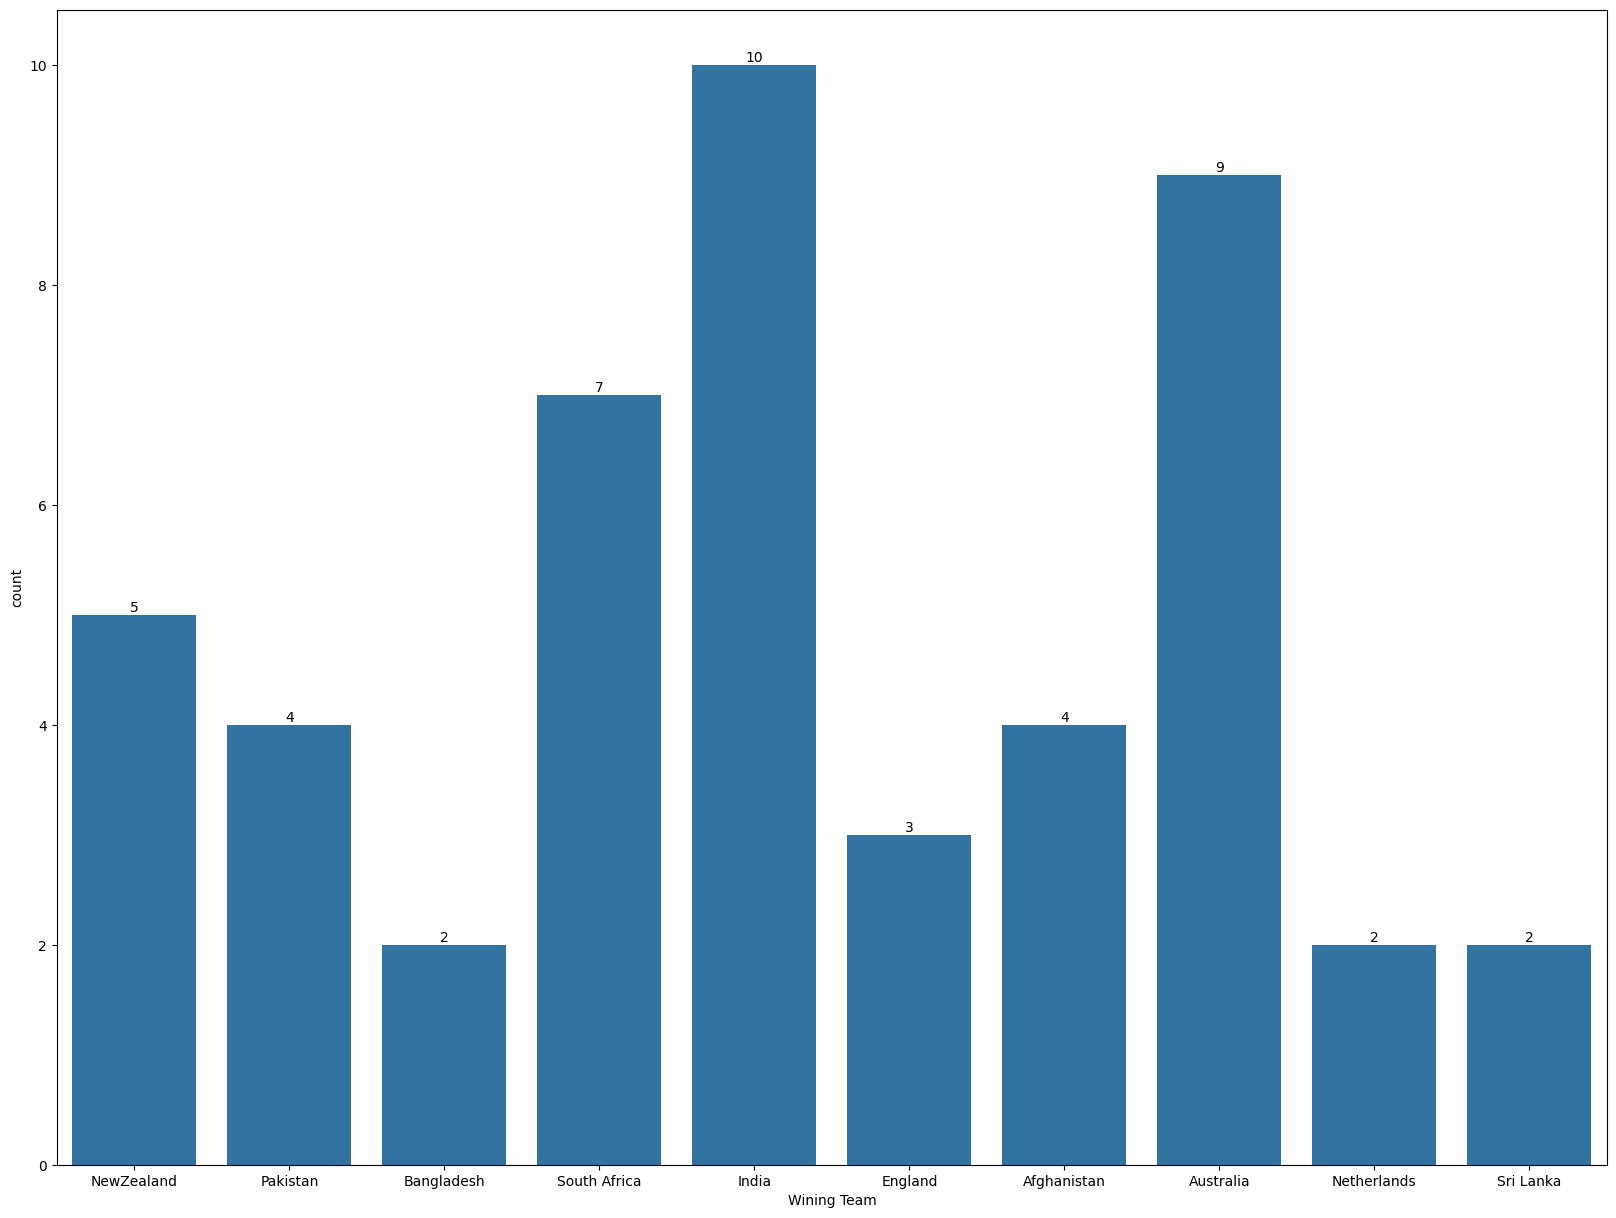

In [6]:
plt.subplots(figsize=(20,15))
ax=sns.countplot(df,x=df['Wining Team'])
for bars in ax.containers:
    ax.bar_label(bars)

#### Which team won, batting or bowling?

In [7]:
df['won_by'] = df['Margin'].apply(lambda x: x.split(' ')[1])
df.head()

,Match ID,Match Date,Match Time,City,Stadium,Team A,Team B,Toss Winner,Toss Decision,Score A,...,Penalty B,Extras B,Wining Team,Margin,Man of the Match,Umpire 1,Umpire 2,TV Umpire,Match Refree,won_by
0,1,05-10-2023,2:00 PM,Ahmedabad,Narendra Modi Stadium,England,NewZealand,NewZealand,Field,282,...,0,6,NewZealand,9 Wickets,Rachin Ravindra,Kumar Dharmasena,Nitin Menon,Paul Wilson,Javagal Srinath,Wickets
1,2,06-10-2023,2:00 PM,Hyderabad,Eden Gardens,Pakistan,Netherlands,Netherlands,Field,286,...,0,9,Pakistan,81 Runs,Saud Shakeel,Adrian Holdstock,Chris Brown,Rod Tucker,Jeff Crowe,Runs
2,3,07-10-2023,2:00 PM,Dharamshala,HPCA Stadium,Afghanistan,Bangladesh,Bangladesh,Field,156,...,0,8,Bangladesh,6 Wickets,Mehidy Hasan Miraz,Joel Wilson,Kumar Dharmasena,Ahsan Raza,Andy Pycroft,Wickets
3,4,07-10-2023,2:00 PM,Delhi,Arun Jaitley Stadium,South Africa,Sri Lanka,Sri Lanka,Field,428,...,0,23,South Africa,102 Runs,Aiden Markram,Richard Illingworth,Sharfuddoula,Michael Gough,Javagal Srinath,Runs
4,5,08-10-2023,2:00 PM,Chennai,M. A. Chidambaram Stadium,Australia,India,Australia,Bat,199,...,0,12,India,6 wickets,KL Rahul,Chris Gaffaney,Richard Kettleborough,Chris Brown,Richie Richardson,wickets


In [8]:
df['won_by'].value_counts()

won_by
Runs       23
Wickets    22
wickets     1
69          1
Wicket      1
Name: count, dtype: int64

In [9]:
df['won_by'].replace("69","Runs",inplace=True)

In [10]:
df['won_by'].replace("Wicket","Wickets",inplace=True)
df['won_by'].replace("wickets","Wickets",inplace=True)

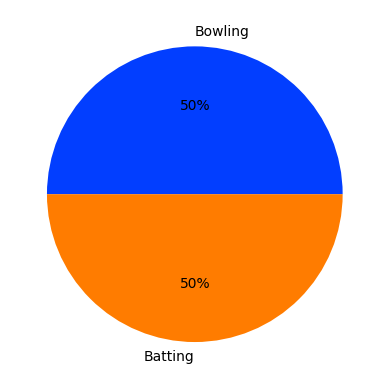

In [11]:
data = df['won_by'].value_counts()
keys = ['Bowling','Batting']  
palette_color = sns.color_palette('bright') 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')  
plt.show()

#### Most MVP

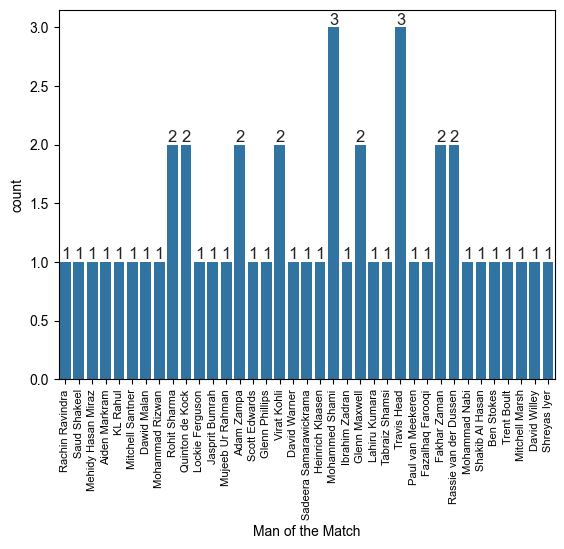

In [12]:
ax = sns.countplot(x= 'Man of the Match',data=df)
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(x= 'Man of the Match',rotation = 'vertical',size=8)
for bars in ax.containers:
    ax.bar_label(bars)

#### Avarage runs scored in a stadium

In [13]:
df['Total_avg_runs']=(df['Score A']+df['Score B'])/2

In [14]:
df.head()

,Match ID,Match Date,Match Time,City,Stadium,Team A,Team B,Toss Winner,Toss Decision,Score A,...,Extras B,Wining Team,Margin,Man of the Match,Umpire 1,Umpire 2,TV Umpire,Match Refree,won_by,Total_avg_runs
0,1,05-10-2023,2:00 PM,Ahmedabad,Narendra Modi Stadium,England,NewZealand,NewZealand,Field,282,...,6,NewZealand,9 Wickets,Rachin Ravindra,Kumar Dharmasena,Nitin Menon,Paul Wilson,Javagal Srinath,Wickets,282.5
1,2,06-10-2023,2:00 PM,Hyderabad,Eden Gardens,Pakistan,Netherlands,Netherlands,Field,286,...,9,Pakistan,81 Runs,Saud Shakeel,Adrian Holdstock,Chris Brown,Rod Tucker,Jeff Crowe,Runs,245.5
2,3,07-10-2023,2:00 PM,Dharamshala,HPCA Stadium,Afghanistan,Bangladesh,Bangladesh,Field,156,...,8,Bangladesh,6 Wickets,Mehidy Hasan Miraz,Joel Wilson,Kumar Dharmasena,Ahsan Raza,Andy Pycroft,Wickets,157.0
3,4,07-10-2023,2:00 PM,Delhi,Arun Jaitley Stadium,South Africa,Sri Lanka,Sri Lanka,Field,428,...,23,South Africa,102 Runs,Aiden Markram,Richard Illingworth,Sharfuddoula,Michael Gough,Javagal Srinath,Runs,377.0
4,5,08-10-2023,2:00 PM,Chennai,M. A. Chidambaram Stadium,Australia,India,Australia,Bat,199,...,12,India,6 wickets,KL Rahul,Chris Gaffaney,Richard Kettleborough,Chris Brown,Richie Richardson,Wickets,200.0


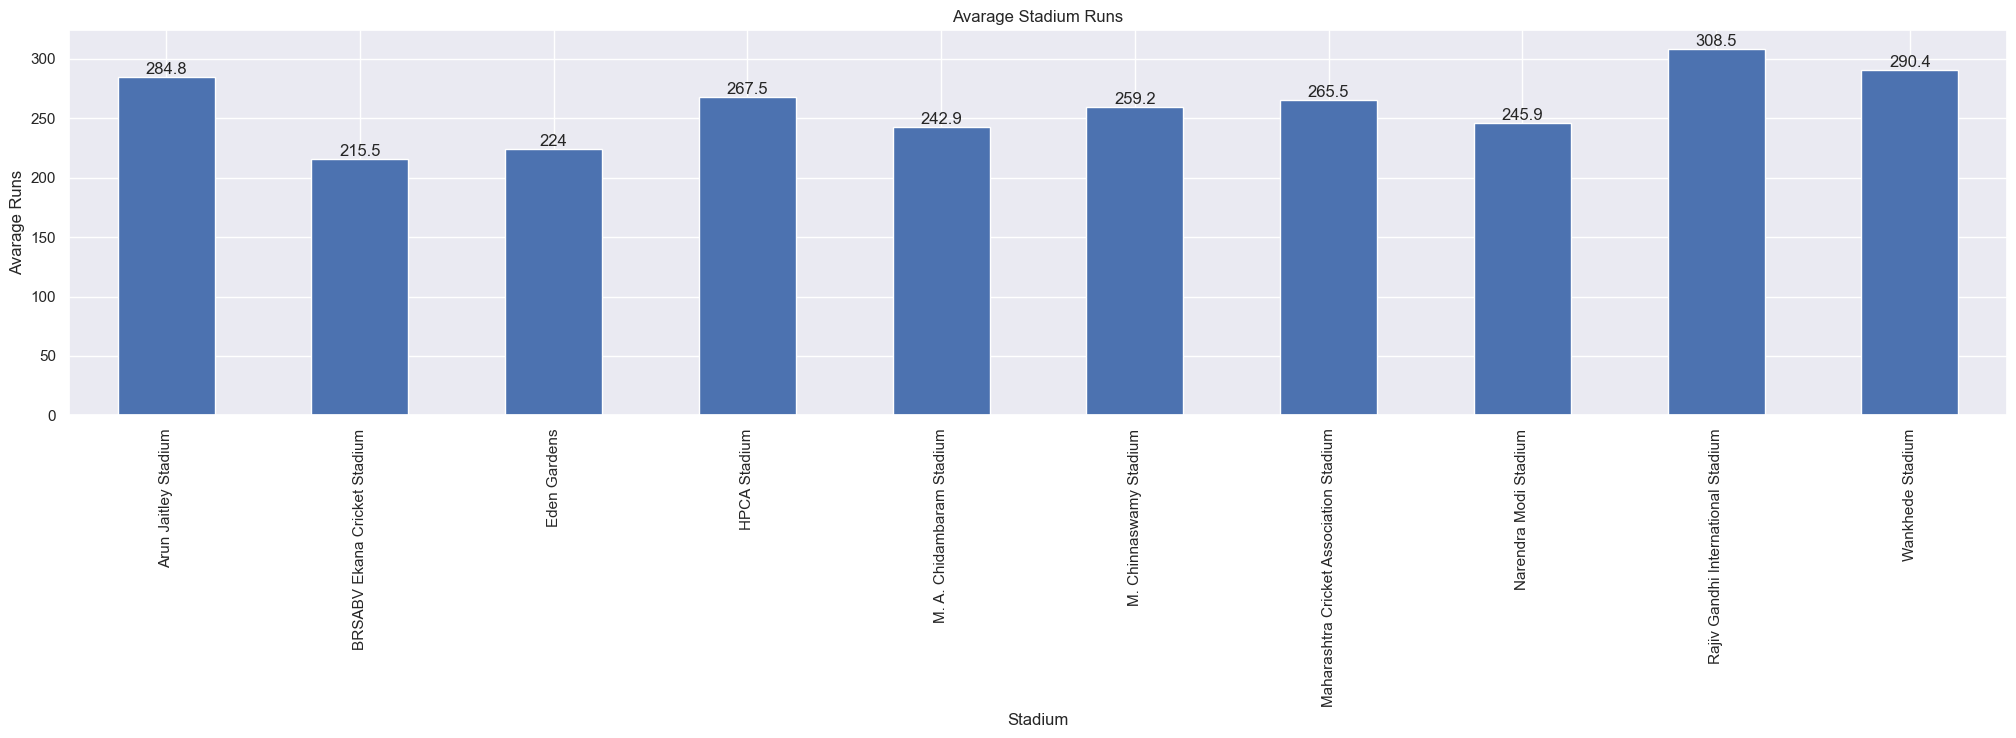

In [15]:
df_groups = df.groupby(['Stadium'])['Total_avg_runs'].mean()
ax=df_groups.plot(kind='bar',title='Avarage Stadium Runs',
               ylabel='Avarage Runs', xlabel='Stadium')
for bars in ax.containers:
    ax.bar_label(bars)

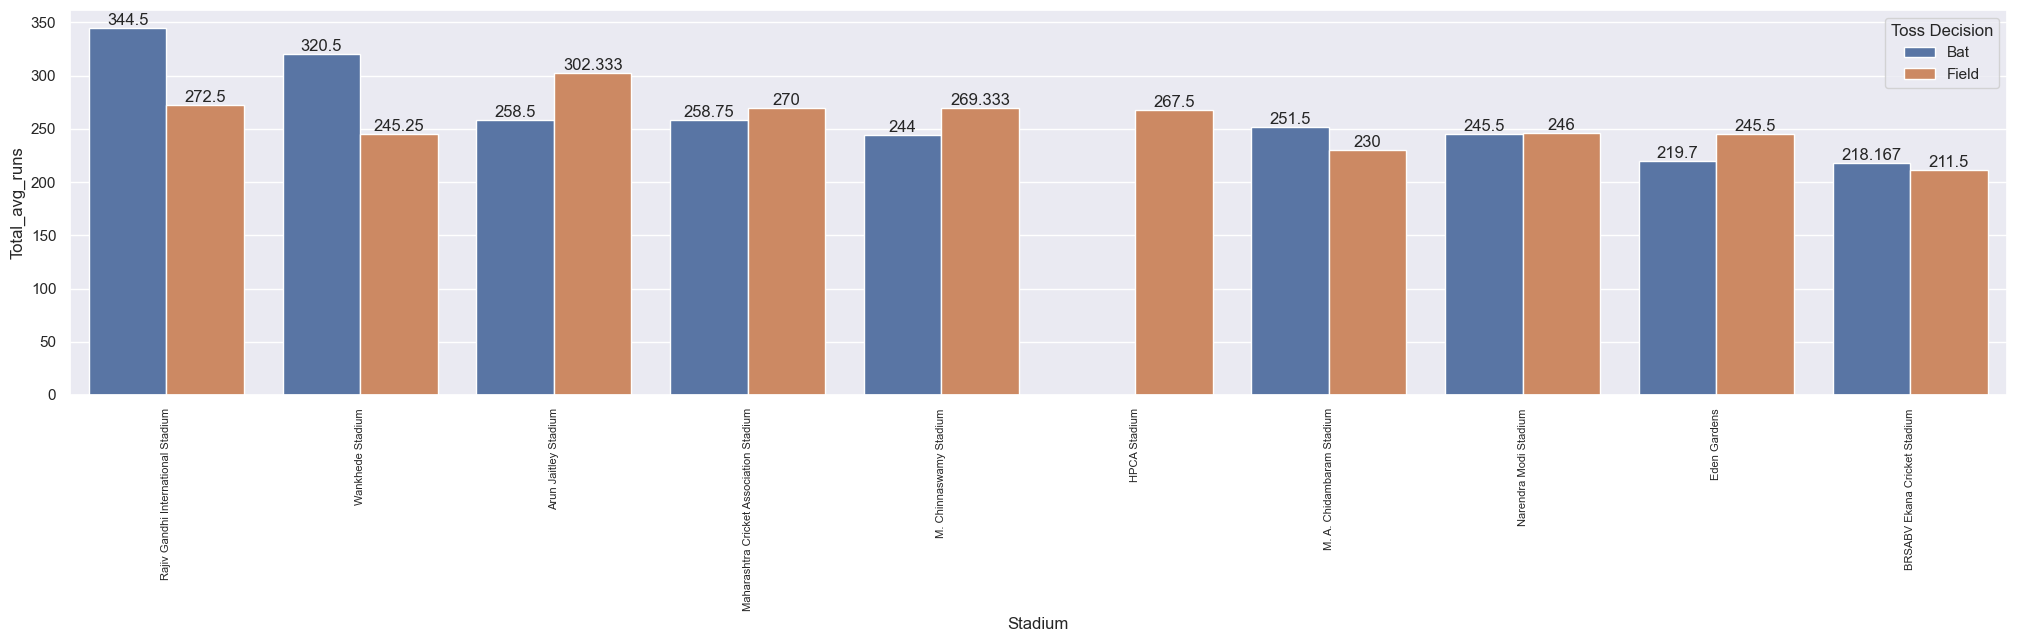

In [16]:
avg_runs = df.groupby(['Stadium','Toss Decision'], as_index=False)['Total_avg_runs'].mean().sort_values(by='Total_avg_runs', ascending=False)
ax=sns.barplot(x= 'Stadium', y= 'Total_avg_runs', hue='Toss Decision', data = avg_runs,)
plt.xticks(x= 'Stadium',rotation = 'vertical',size=8)
for bars in ax.containers:
    ax.bar_label(bars)

#### Avarage and Total Runs scored by each Team

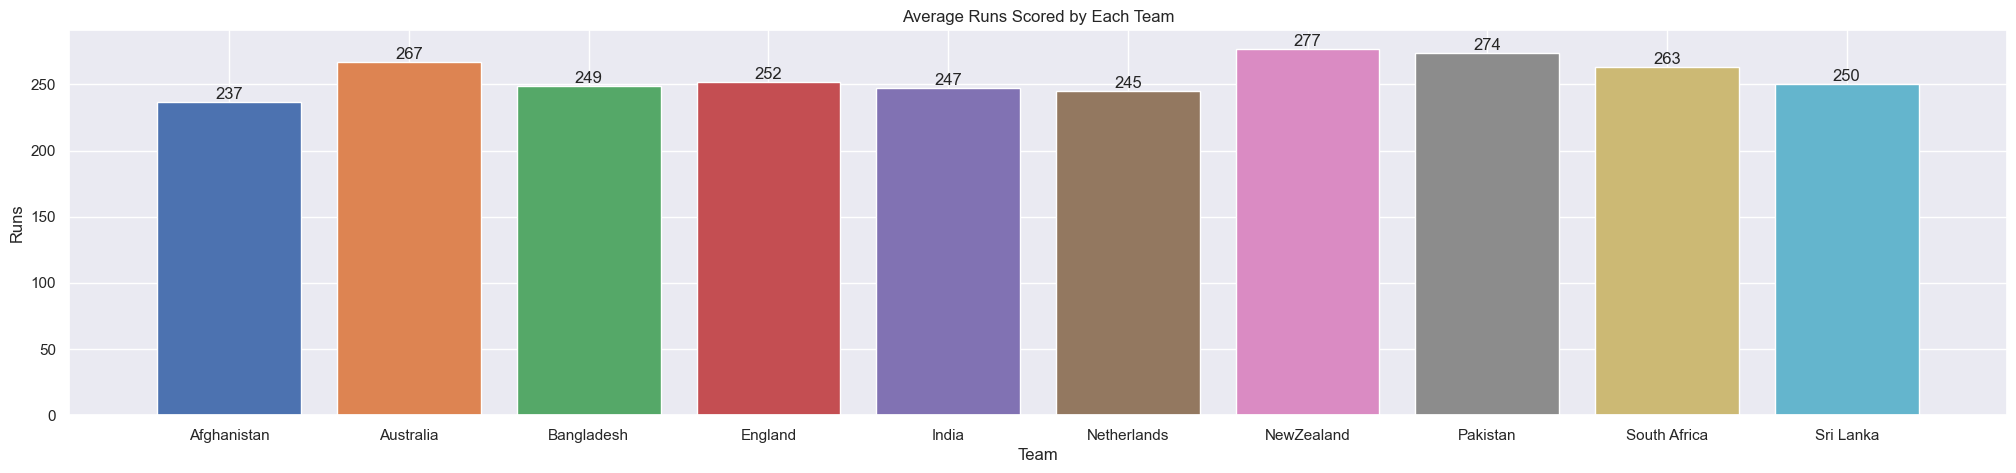

In [41]:
melted_df1 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Score A', 'Score B'], var_name='ScoreType', value_name='Runs')
average_scores = melted_df1.groupby(['Team A', 'Team B'])['Runs'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_score = int(team_data['Runs'].mean())
    ax.bar(team, mean_score)

ax.set_xlabel('Team')
ax.set_ylabel('Runs')
ax.set_title('Average Runs Scored by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

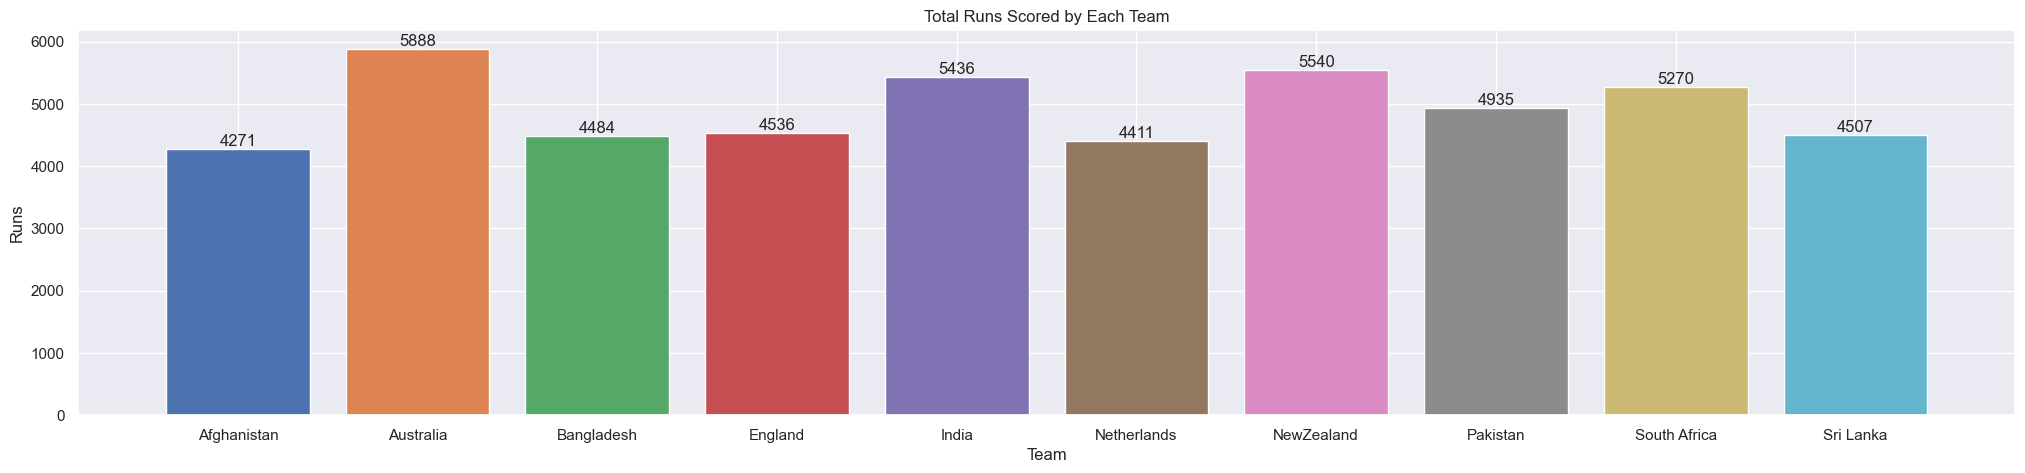

In [59]:
melt_df = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Score A', 'Score B'], var_name='ScoreType', value_name='Runs')
total_scores = melt_df.groupby(['Team A', 'Team B'])['Runs'].sum().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(total_scores['Team A'].unique()) | set(total_scores['Team B'].unique()))

for team in teams:
    team_data = total_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    total_score = int(team_data['Runs'].sum())
    ax.bar(team, total_score)

ax.set_xlabel('Team')
ax.set_ylabel('Runs')
ax.set_title('Total Runs Scored by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Avarage and Total wickets taken by each team

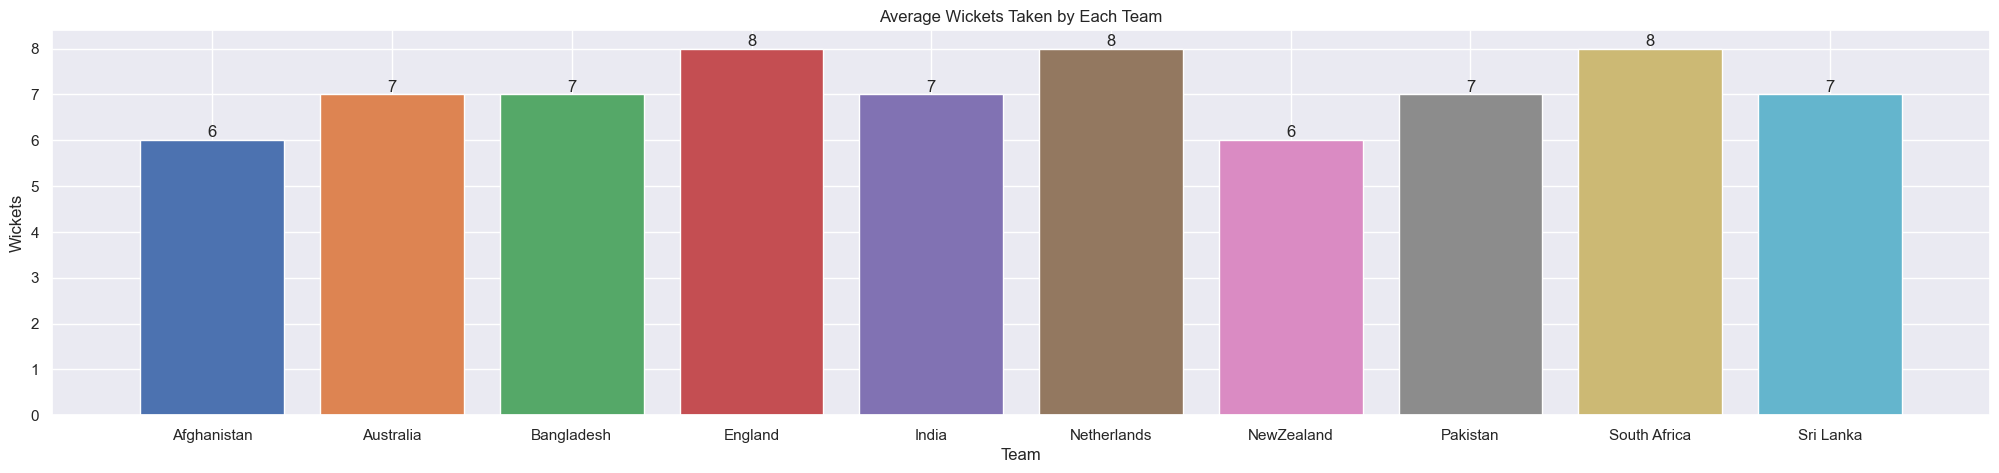

In [60]:
melted_df2 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Wickets A', 'Wickets B'], var_name='ScoreType', value_name='Wickets')
average_wickets = melted_df2.groupby(['Team A', 'Team B'])['Wickets'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_wickets['Team A'].unique()) | set(average_wickets['Team B'].unique()))

for team in teams:
    team_data = average_wickets[(average_wickets['Team A'] == team) | (average_wickets['Team B'] == team)]
    mean_wicket = int(team_data['Wickets'].mean())
    ax.bar(team, mean_wicket)

ax.set_xlabel('Team')
ax.set_ylabel('Wickets')
ax.set_title('Average Wickets Taken by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

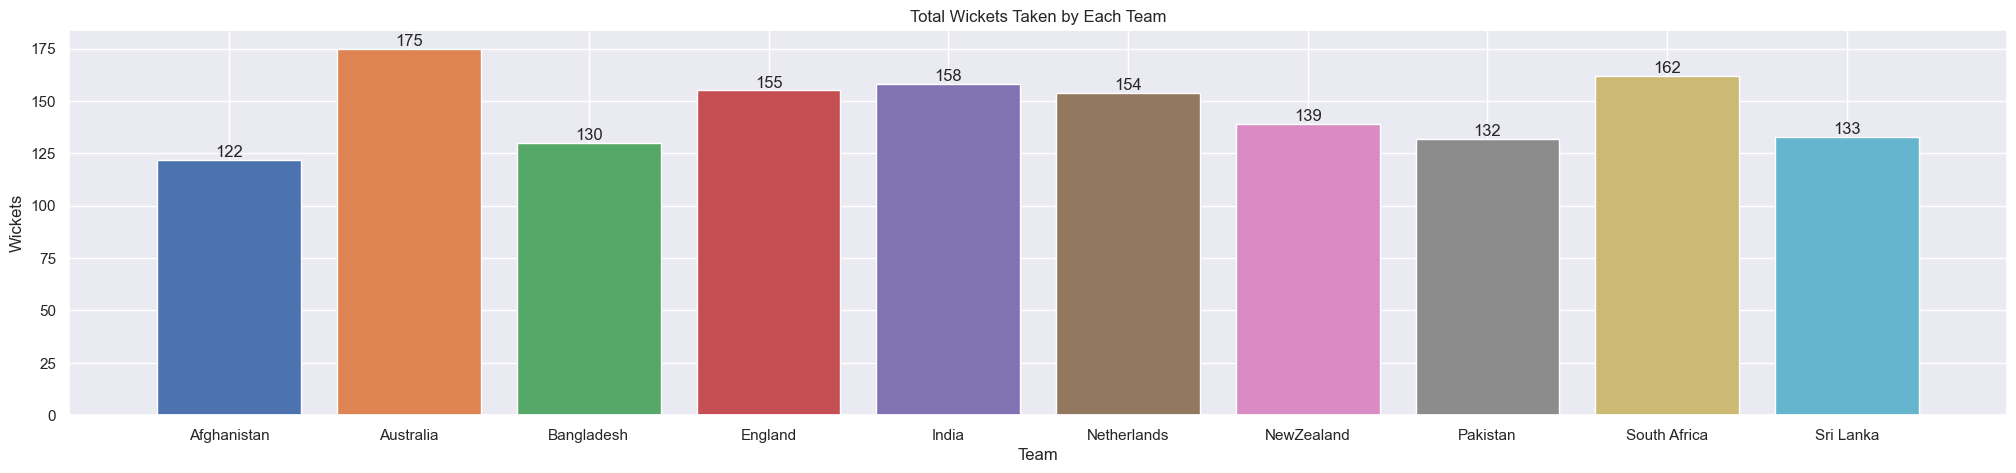

In [62]:
melted_df9 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Wickets A', 'Wickets B'], var_name='ScoreType', value_name='Wickets')
total_wickets = melted_df9.groupby(['Team A', 'Team B'])['Wickets'].sum().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(total_wickets['Team A'].unique()) | set(total_wickets['Team B'].unique()))

for team in teams:
    team_data = total_wickets[(total_wickets['Team A'] == team) | (total_wickets['Team B'] == team)]
    total_wicket = int(team_data['Wickets'].sum())
    ax.bar(team, total_wicket)

ax.set_xlabel('Team')
ax.set_ylabel('Wickets')
ax.set_title('Total Wickets Taken by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Avarage Extras given by each Team

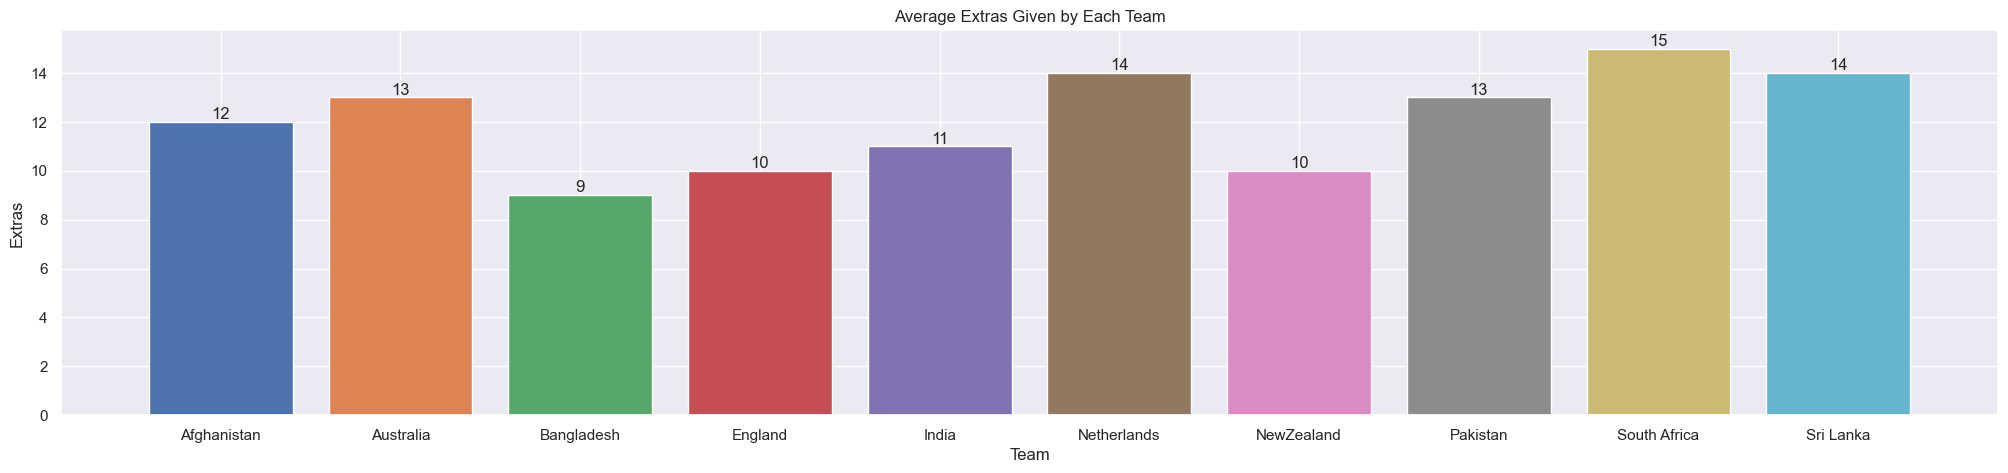

In [43]:
melted_df3 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Extras A', 'Extras B'], var_name='ScoreType', value_name='Extras')
average_scores = melted_df3.groupby(['Team A', 'Team B'])['Extras'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_extra = int(team_data['Extras'].mean())
    ax.bar(team, mean_extra)

ax.set_xlabel('Team')
ax.set_ylabel('Extras')
ax.set_title('Average Extras Given by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Avarage Boundaries scored by each Team

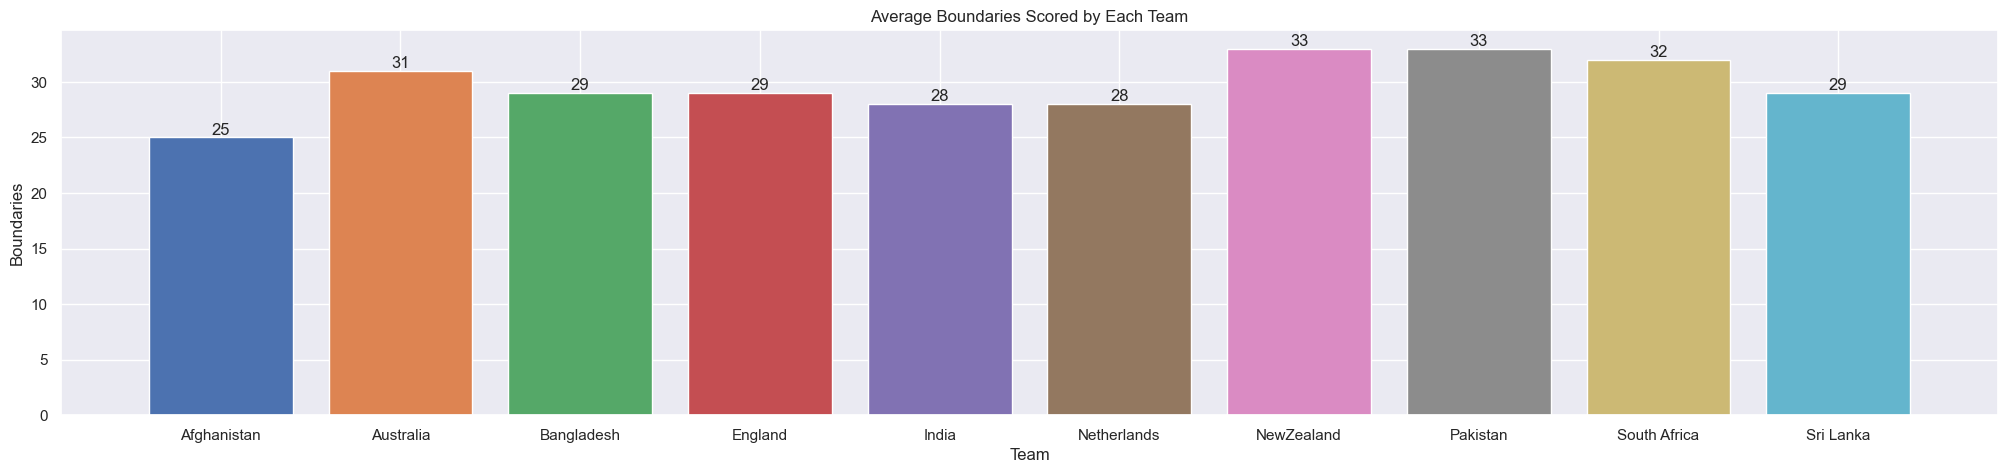

In [44]:
melted_df4 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Boundaries A', 'Boundaries B'], var_name='ScoreType', value_name='Boundaries')
average_scores = melted_df4.groupby(['Team A', 'Team B'])['Boundaries'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_extra = int(team_data['Boundaries'].mean())
    ax.bar(team, mean_extra)

ax.set_xlabel('Team')
ax.set_ylabel('Boundaries')
ax.set_title('Average Boundaries Scored by Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Avarage Runrate of each team

In [48]:
df.dtypes

Match ID              int64
Match Date           object
Match Time           object
City                 object
Stadium              object
Team A               object
Team B               object
Toss Winner          object
Toss Decision        object
Score A               int64
Wickets A             int64
Overs Played A      float64
Maiden Overs A        int64
4s A                  int64
6s A                  int64
Boundaries A          int64
Runrate A           float64
Leg Byes A            int64
Byes A                int64
Wides A               int64
No Balls A            int64
Penalty A             int64
Extras A              int64
Score B               int64
Wickets B             int64
Overs Played B      float64
Maiden Overs B        int64
4s B                  int64
6s B                  int64
Boundaries B          int64
Runrate B            object
Leg Byes B            int64
Byes B                int64
Wides B               int64
No Balls B            int64
Penalty B           

In [51]:
df['Runrate B'].replace("5,20","5.20",inplace=True)
df['Runrate B'] = pd.to_numeric(df['Runrate B'])

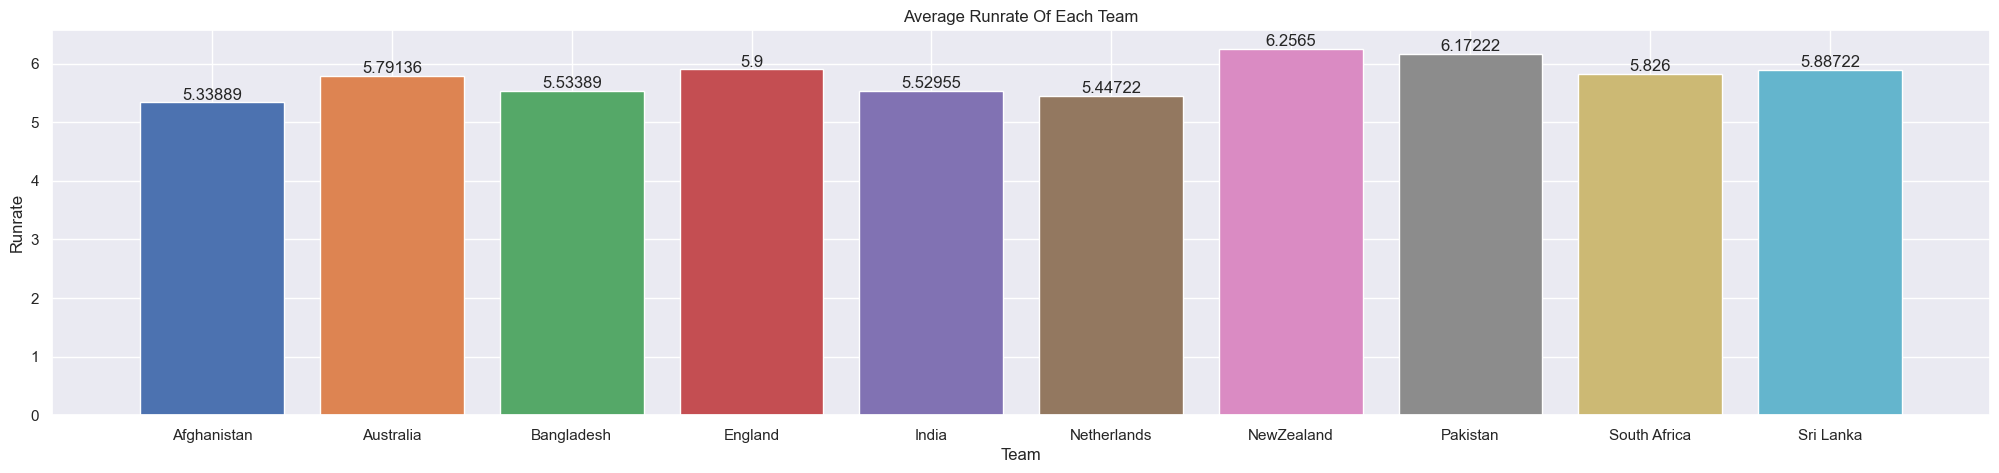

In [54]:
melted_df5 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['Runrate A', 'Runrate B'], var_name='ScoreType', value_name='Runrate')
average_scores = melted_df5.groupby(['Team A', 'Team B'])['Runrate'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_extra =team_data['Runrate'].mean()
    ax.bar(team, mean_extra)

ax.set_xlabel('Team')
ax.set_ylabel('Runrate')
ax.set_title('Average Runrate Of Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Avarage and Total Noball by each team

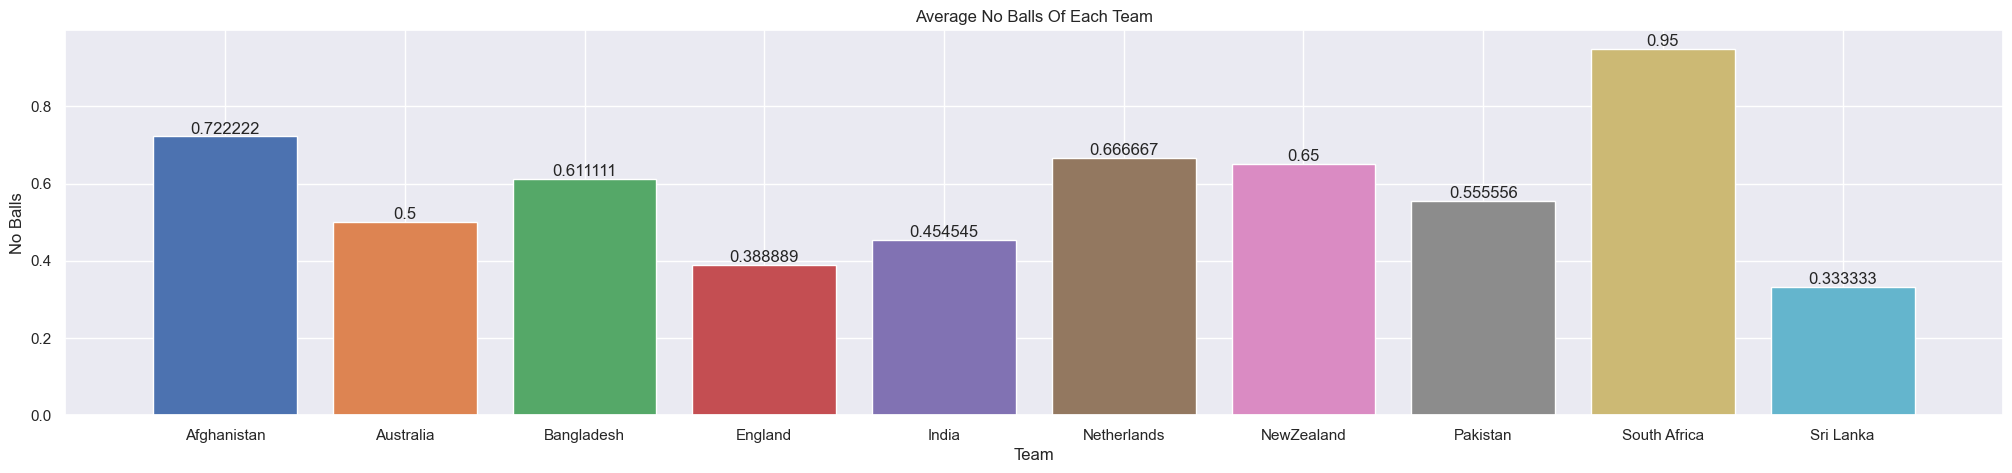

In [56]:
melted_df6 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['No Balls A', 'No Balls B'], var_name='ScoreType', value_name='No Balls')
average_scores = melted_df6.groupby(['Team A', 'Team B'])['No Balls'].mean().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_extra =team_data['No Balls'].mean()
    ax.bar(team, mean_extra)

ax.set_xlabel('Team')
ax.set_ylabel('No Balls')
ax.set_title('Average No Balls Of Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

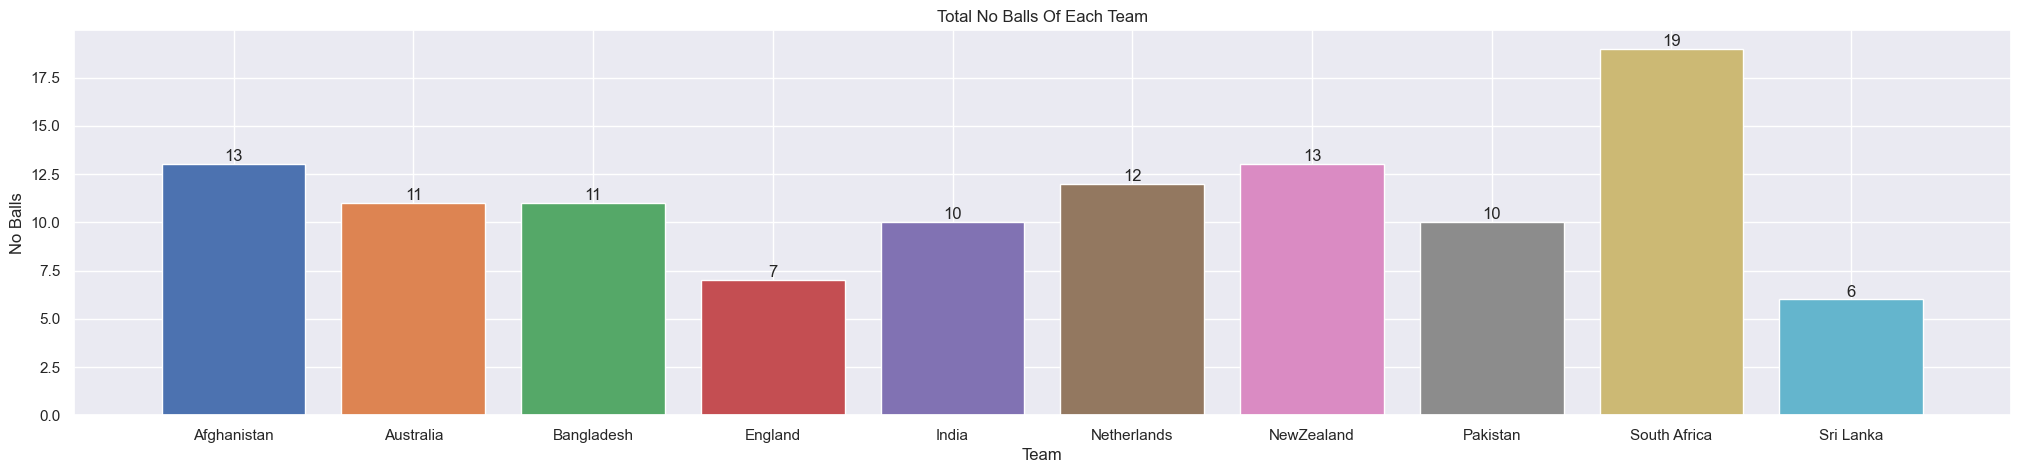

In [63]:
melted_df7 = pd.melt(df, id_vars=['Team A', 'Team B'], value_vars=['No Balls A', 'No Balls B'], var_name='ScoreType', value_name='No Balls')
average_scores = melted_df7.groupby(['Team A', 'Team B'])['No Balls'].sum().reset_index()
fig, ax = plt.subplots()
teams = sorted(set(average_scores['Team A'].unique()) | set(average_scores['Team B'].unique()))

for team in teams:
    team_data = average_scores[(average_scores['Team A'] == team) | (average_scores['Team B'] == team)]
    mean_extra =team_data['No Balls'].sum()
    ax.bar(team, mean_extra)

ax.set_xlabel('Team')
ax.set_ylabel('No Balls')
ax.set_title('Total No Balls Of Each Team')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()